# **Mall Customer Segmentaion Dataset**


**A Description of the dataset :**

*   This dataset is created only for learning purposes related to customer segmentation concepts.
*  It has 5 features and 200 instances.

*  The features in the dataset: [Customer ID , Age , Gender, Annual Income and Spending Score]



**Problem Statement :**


*   You own a supermarket and through membership cards you have some basic data about your customers. You want to understand the customers' behavior such as identifying those who are more likely to convert [Target Customers] so that the marketing team can plan their strategy accordingly.



---







# **Preprocessing**

First we will load and explore the dataset.

In [ ]:
import numpy as np
import pandas as pd
import time

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Check for missing (null) values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


There are no (null) values, so the dataset is complete.






In [ ]:
# Check for duplicates in the dataset
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#Drop unrelated columns
customer_data = df.drop(['CustomerID'], axis=1)
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
# Converting categorical 'Gender' column to numeric values for model compatibility
# Mapping: Male → 0, Female → 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
customer_data['Gender'] = le.fit_transform(customer_data['Gender'])
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
#Create two new features based on the existing ones.
customer_data['Spending Per Age']= customer_data['Spending Score (1-100)']/customer_data['Age']
customer_data['Spending Efficiency']= customer_data['Spending Score (1-100)']/customer_data['Annual Income (k$)']
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Per Age,Spending Efficiency
0,1,19,15,39,2.052632,2.600000
1,1,21,15,81,3.857143,5.400000
2,0,20,16,6,0.300000,0.375000
3,0,23,16,77,3.347826,4.812500
4,0,31,17,40,1.290323,2.352941


### **StandardScaler**

In [ ]:
# Apply StandardScaler to normalize the features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Age','Annual Income (k$)','Spending Score (1-100)','Spending Per Age','Spending Efficiency']
scaled_customer_data = scaler.fit_transform(customer_data[columns_to_scale])

# Converting the scaled features back into a DataFrame
scaled_customer_data = pd.DataFrame(scaled_customer_data, columns = columns_to_scale)

# Adding the Gender column to the DataFrame
scaled_customer_data['Gender'] = customer_data['Gender']

In [ ]:
# Visualize data
import matplotlib.pyplot as plt

In [ ]:
# Splitting based on gender
male = scaled_customer_data[scaled_customer_data['Gender']==1]
female = scaled_customer_data[scaled_customer_data['Gender']==0]

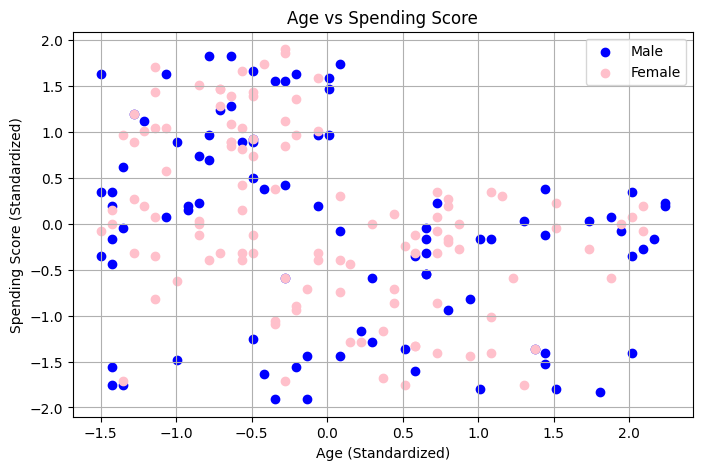

In [ ]:
# Age vs Spending Score visual
plt.figure(figsize=(8,5))
plt.scatter(male['Age'],male['Spending Score (1-100)'], color = 'blue', label = 'Male')
plt.scatter(female['Age'], female['Spending Score (1-100)'], color = 'pink', label = 'Female')
plt.title('Age vs Spending Score')
plt.xlabel('Age (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.grid(True)
plt.legend()

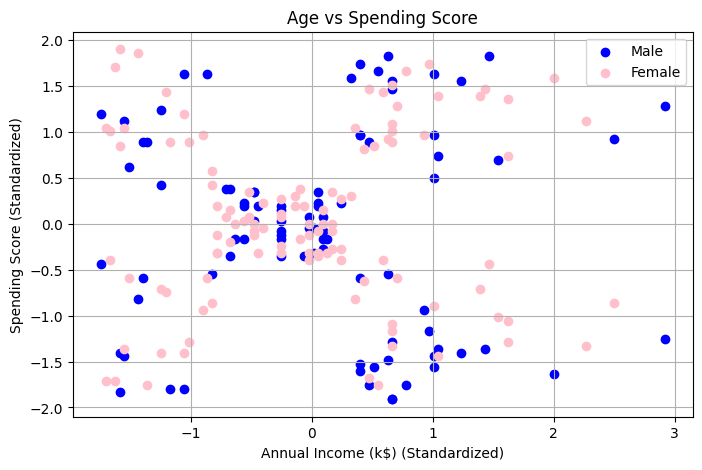

In [ ]:
# Annual Income vs Spending score visual
plt.figure(figsize=(8,5))
plt.scatter(male['Annual Income (k$)'],male['Spending Score (1-100)'], color = 'blue', label = 'Male')
plt.scatter(female['Annual Income (k$)'], female['Spending Score (1-100)'], color = 'pink', label = 'Female')
plt.title('Age vs Spending Score')
plt.xlabel('Annual Income (k$) (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.grid(True)
plt.legend()

## **Dimensionality Reduction**


### **PCA**

In [ ]:
#Apply PCA to scaled data
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(scaled_customer_data)
cumulative_variance = pca.explained_variance_ratio_.cumsum()

In [ ]:
# Find number of components for 90% and 95%
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Minimum components for ≥90% variance: {n_components_90}")
print(f"Minimum components for ≥95% variance: {n_components_95}")

Minimum components for ≥90% variance: 3
Minimum components for ≥95% variance: 4


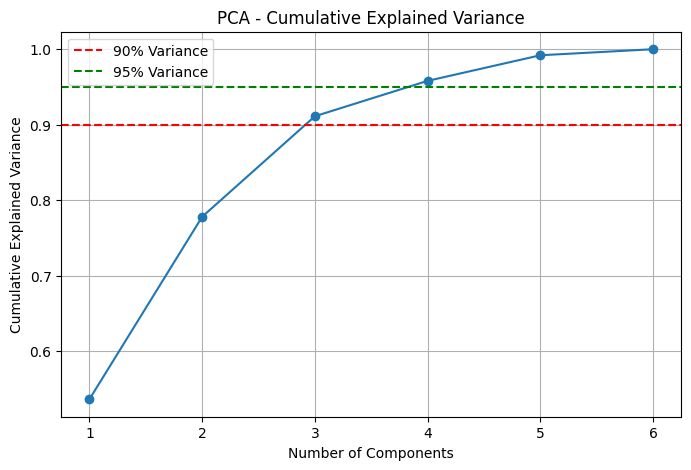

In [ ]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1,len(cumulative_variance) +1),cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# apply PCA with 3 components for visualization
pca_final = PCA(n_components=3) # keep the first 3 principal compenents of the data
# fit pca model to mall customer data
pca_components = pca_final.fit_transform(scaled_customer_data)
print("Original shape:", scaled_customer_data.shape)
print("Reduced shape:", pca_components.shape)

Original shape: (200, 6)
Reduced shape: (200, 3)


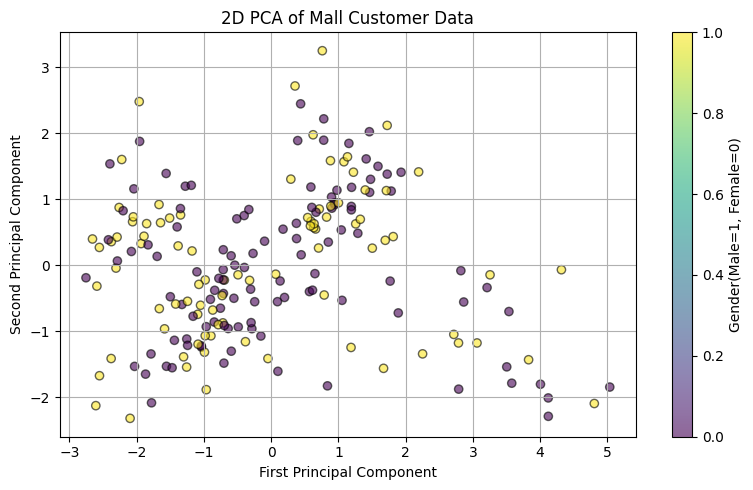

In [ ]:
#  Visualize the reduced 2D space
plt.figure(figsize=(8, 5))
plt.scatter(pca_components[:, 0], pca_components[:, 1],c = customer_data['Gender'], edgecolor='black', alpha=0.6)
plt.title('2D PCA of Mall Customer Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Gender(Male=1, Female=0)')
plt.grid(True)
plt.tight_layout()
plt.show()

### **t-SNE**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# Initialize t-SNE to reduce dimensions to 2 for visualization
tsne = TSNE(n_components=2,  random_state=42)
# Fit t-SNE to the scaled customer data and transform it
tsne_components = tsne.fit_transform(scaled_customer_data)

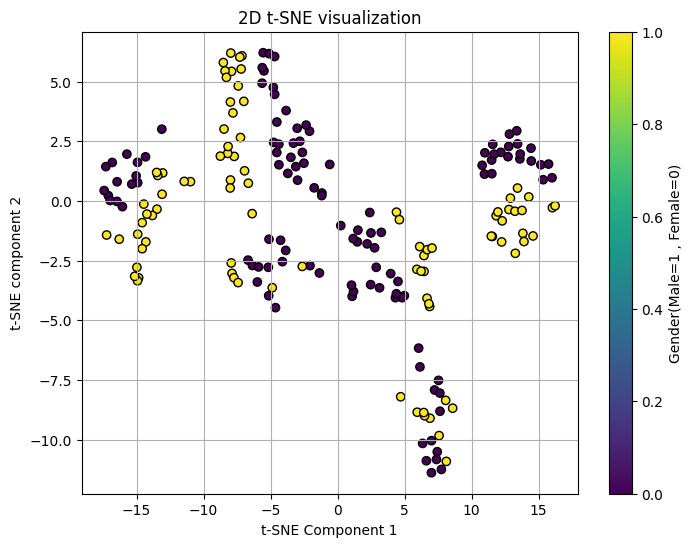

In [ ]:
#t-SNE 2D visualization
plt.figure(figsize=(8,6))
plt.scatter(tsne_components[:,0], tsne_components[:, 1], c=customer_data['Gender'],edgecolors='black')
plt.title('2D t-SNE visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE component 2')
plt.colorbar(label='Gender(Male=1 , Female=0)')
plt.grid(True)
plt.show()

### **KMeans**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

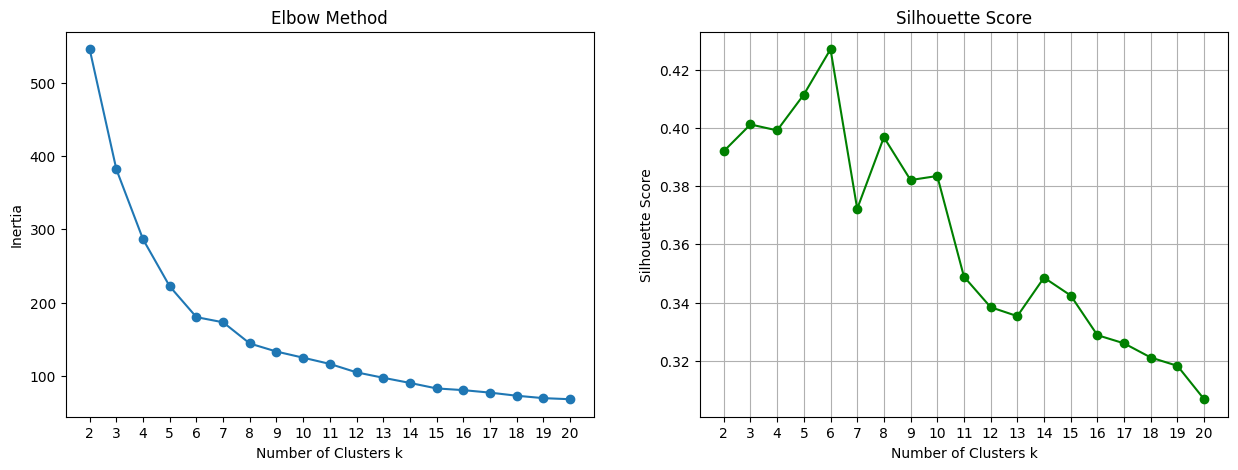

In [ ]:
# Initialize lists to store inertia and silhouette scores for each value of k
inertias = []
silhouette_scores = []

K = range(2,21)
for k in K:
  kmeans = KMeans(n_clusters = k, init = 'k-means++' ,random_state = 42)
  kmeans.fit(pca_components)
  inertias.append(kmeans.inertia_)
  score = silhouette_score(pca_components, kmeans.labels_)
  silhouette_scores.append(score)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(K, inertias, marker ='o')
plt.xticks(K)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, marker = 'o', color = 'green')
plt.xticks(K)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters k')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
start_k = time.time()
# Initialize the KMeans clustering model with 5 clusters
kmeans = KMeans (n_clusters = 5, random_state = 42)
# Fit the KMeans model on the PCA-transformed data
kmeans.fit(pca_components)
labels = kmeans.labels_
end_k = time.time()
#time
kmeans_time = round(end_k - start_k, 4)
print(f"KMeans: {kmeans_time} seconds")

KMeans: 0.005 seconds


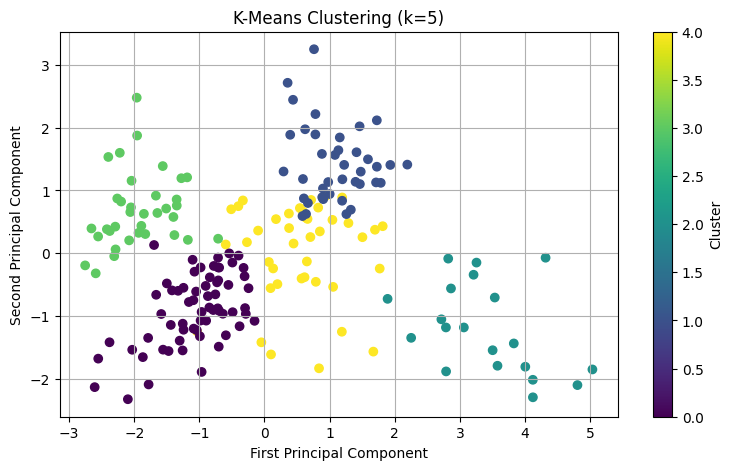

In [ ]:
plt.figure(figsize=(9,5))
plt.scatter(pca_components[:,0], pca_components[:,1], c= labels)
plt.title('K-Means Clustering (k=5)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label = 'Cluster')
plt.grid(True)
plt.show()

In [ ]:
#Minibatch kmeans vs KMeans:
from sklearn.cluster import MiniBatchKMeans
k=5
#Time for MiniBatch KMeans
start_m = time.time()

mini_kmeans = MiniBatchKMeans(n_clusters=k,random_state=42)
labels = mini_kmeans.fit_predict(pca_components)

end_m = time.time()
minibatch_time = round(end_m - start_m, 4)

inertia = round(mini_kmeans.inertia_ , 2)
sil_score = round(silhouette_score(pca_components, labels),2)
print(f"MiniBatchKMeans (k={k})")
print('Inertia: ',inertia)
print('Silhouette Score: ', sil_score)
print(f"MiniBatch KMeans: {minibatch_time} seconds")

MiniBatchKMeans (k=5)
Inertia:  270.77
Silhouette Score:  0.35
MiniBatch KMeans: 0.0161 seconds


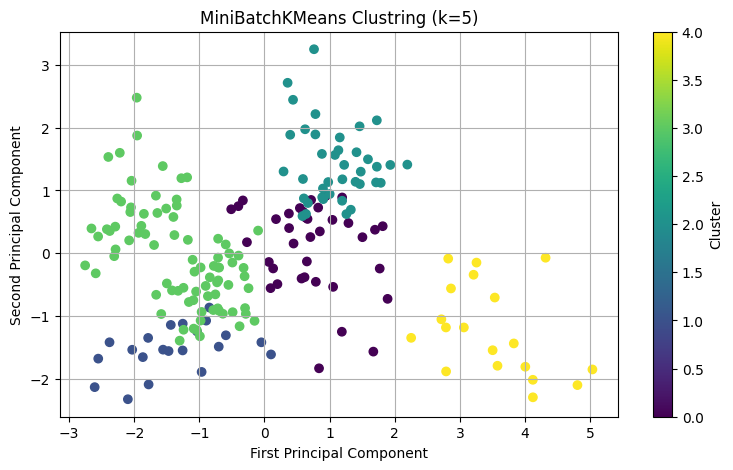

In [ ]:
plt.figure(figsize=(9,5))
plt.scatter(pca_components[:,0], pca_components[:,1], c= labels)
plt.title('MiniBatchKMeans Clustring (k=5)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label = 'Cluster')
plt.grid(True)
plt.show()

The MiniBatch KMeans gave similar results to the KMeans, but the cluster boundaries were less distinct.

Although MiniBatch KMeans is typically faster for large datasets, in this case, it actually took slightly longer than standard KMeans. This is likely due to the small size of the dataset, where the batching overhead outweighs the performance benefit. Overall, both methods gave similar results, but KMeans was slightly faster and had a better silhouette score.

Storage wise, the MiniBatch KMeans is designed to use smaller memory batches making it more suitable for larger datasets, so there is not much of a difference in the case of this dataset since its not large.

In conclusion both methods handled the data well but KMeans is better because of the slightly better clustering.

**Therefor, We chose to continue the analysis using regular KMeans.**

In [ ]:
#Create silhouette diagrams for 3 values of k

### **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
X = pca_components
# time for DBSCAN
#fitting DBSCAN
start_d = time.time()
dbscan = DBSCAN(eps = .7,min_samples=3)
labels = dbscan.fit_predict(X)

end_d = time.time()
dbscan_time = round(end_d - start_d, 4)

db_clusters = len(set(labels)) -(1 if -1 in labels else 0)
db_noise = list(labels).count(-1)

print('Number of clusters found:', db_clusters)
print('Number of noise points found:', db_noise)
print(f"DBSCAN: {dbscan_time} seconds")


Number of clusters found: 5
Number of noise points found: 12
DBSCAN: 0.0076 seconds


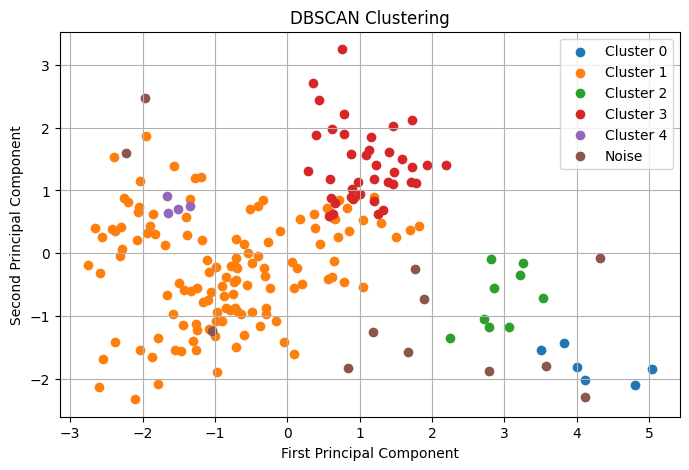

In [ ]:
unique_labels = set(labels)
plt.figure(figsize=(8,5))
for label in unique_labels:
  cluster = X[labels == label]
  plt.scatter(cluster[:,0],cluster[:,1], label ='Noise' if label == -1 else f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)
plt.show()


comparing to the KMeans clusters, the KMeans clusters appear to be more well-defined and separated with better separation between groups in the dataset.

### **Sensitivity Analysis**

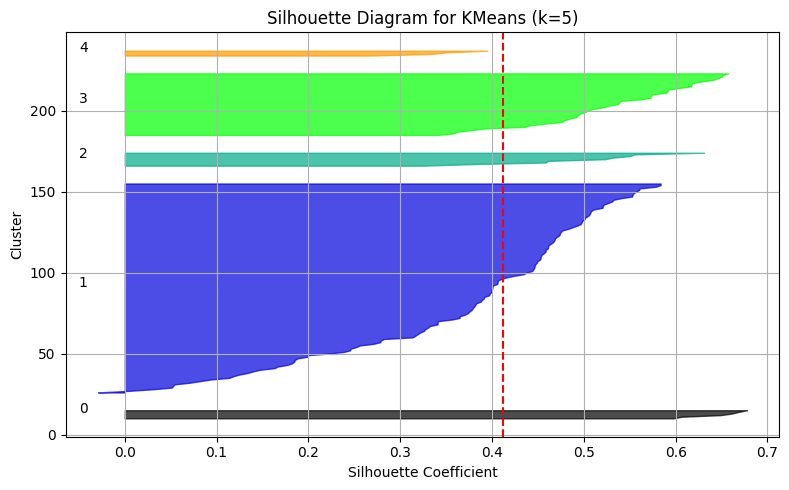

In [ ]:
# Silhouette diagram for KMeans (k=5)
from sklearn.metrics import silhouette_samples
k = 5
silhouette_vals = silhouette_samples(pca_components, kmeans.labels_)

plt.figure(figsize=(8, 5))
y_lower = 10
for i in range(k):
    ith_vals = silhouette_vals[labels == i]
    ith_vals.sort()
    size = len(ith_vals)
    y_upper = y_lower + size
    color = plt.cm.nipy_spectral(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_vals, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size, str(i))
    y_lower = y_upper + 10

plt.axvline(np.mean(silhouette_vals), color='red', linestyle='--')
plt.title('Silhouette Diagram for KMeans (k=5)')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

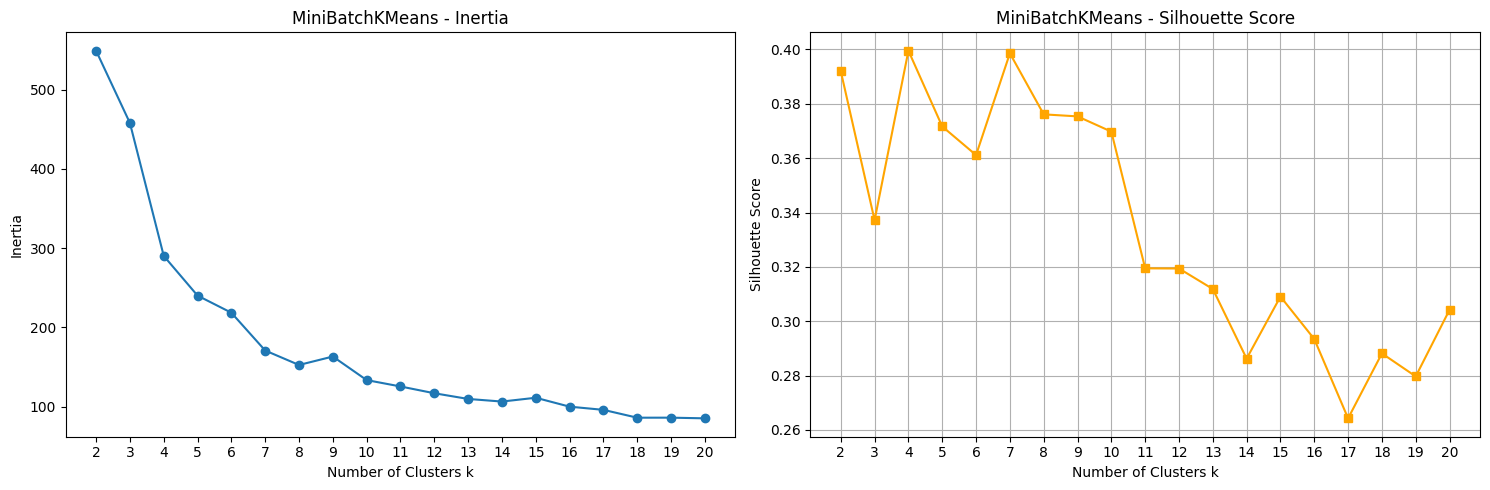

In [ ]:
# Sensitivity analysis for MiniBatchKMeans
mb_inertias = []
mb_silhouette_scores = []
K = range(2, 21)

for k in K:
    mbk = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=32)
    labels = mbk.fit_predict(pca_components)
    mb_inertias.append(mbk.inertia_)
    mb_silhouette_scores.append(silhouette_score(pca_components, labels))

# Plotting inertia and silhouette for MiniBatchKMeans
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(K, mb_inertias, marker='o')
plt.xticks(K)
plt.title('MiniBatchKMeans - Inertia')
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, mb_silhouette_scores, marker='s', color='orange')
plt.xticks(K)
plt.title('MiniBatchKMeans - Silhouette Score')
plt.xlabel('Number of Clusters k')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# KMeans on original scaled data
kmeans_original = KMeans(n_clusters=5, random_state=42)
labels_original = kmeans_original.fit_predict(scaled_customer_data)

# Evaluate performance
inertia_original = kmeans_original.inertia_
silhouette_original = silhouette_score(scaled_customer_data, labels_original)

print("KMeans on ORIGINAL scaled data")
print("Inertia:", inertia_original)
print("Silhouette Score:", round(silhouette_original, 4))

KMeans on ORIGINAL scaled data
Inertia: 332.1397739240226
Silhouette Score: 0.3222


In [ ]:
# KMeans on PCA-reduced data
kmeans_pca = KMeans(n_clusters=5, random_state=42)
labels_pca = kmeans_pca.fit_predict(pca_components)

# Evaluate performance
inertia_pca = kmeans_pca.inertia_
silhouette_pca = silhouette_score(pca_components, labels_pca)

print("\nKMeans on PCA-reduced data")
print("Inertia:", inertia_pca)
print("Silhouette Score:", round(silhouette_pca, 4))


KMeans on PCA-reduced data
Inertia: 222.05235341447434
Silhouette Score: 0.4115


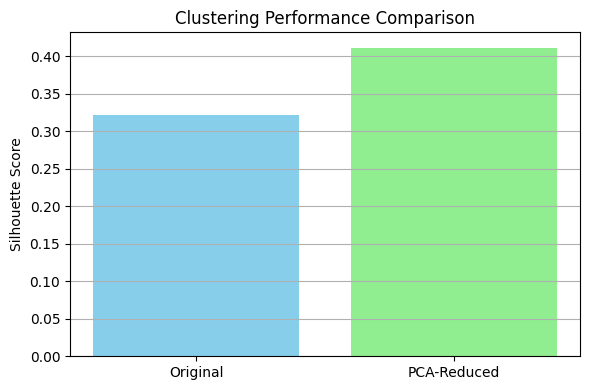

In [ ]:
# Compare silhouette scores visually
plt.figure(figsize=(6, 4))
scores = [silhouette_original, silhouette_pca]
bars = ['Original', 'PCA-Reduced']
plt.bar(bars, scores, color=['skyblue', 'lightgreen'])
plt.ylabel('Silhouette Score')
plt.title('Clustering Performance Comparison')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


THE RESULTS:

Inertia	If PCA Is Better Lower value==tighter clusters

Inertia	If original Is Better Lower value==tighter clusters

Silhouette Score If PCA Is Better Closer to 1==clearer separation

Silhouette Score If original Is Better Higher score==better-defined clusters

In [ ]:
# KMeans on full feature space (scaled)
kmeans_full = KMeans(n_clusters=5, random_state=42)
labels_full = kmeans_full.fit_predict(scaled_customer_data)

inertia_full = kmeans_full.inertia_
silhouette_full = silhouette_score(scaled_customer_data, labels_full)

print("KMeans on Full Scaled Data")
print("Inertia:", inertia_full)
print("Silhouette Score:", round(silhouette_full, 4))

KMeans on Full Scaled Data
Inertia: 332.1397739240226
Silhouette Score: 0.3222


In [ ]:
# Apply PCA to reduce to 2D
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_2d_components = pca_2d.fit_transform(scaled_customer_data)

# KMeans on 2D PCA data
kmeans_2d = KMeans(n_clusters=5, random_state=42)
labels_2d = kmeans_2d.fit_predict(pca_2d_components)

inertia_2d = kmeans_2d.inertia_
silhouette_2d = silhouette_score(pca_2d_components, labels_2d)

print("\nKMeans on 2D PCA-Reduced Data")
print("Inertia:", inertia_2d)
print("Silhouette Score:", round(silhouette_2d, 4))


KMeans on 2D PCA-Reduced Data
Inertia: 144.7582040331151
Silhouette Score: 0.4757


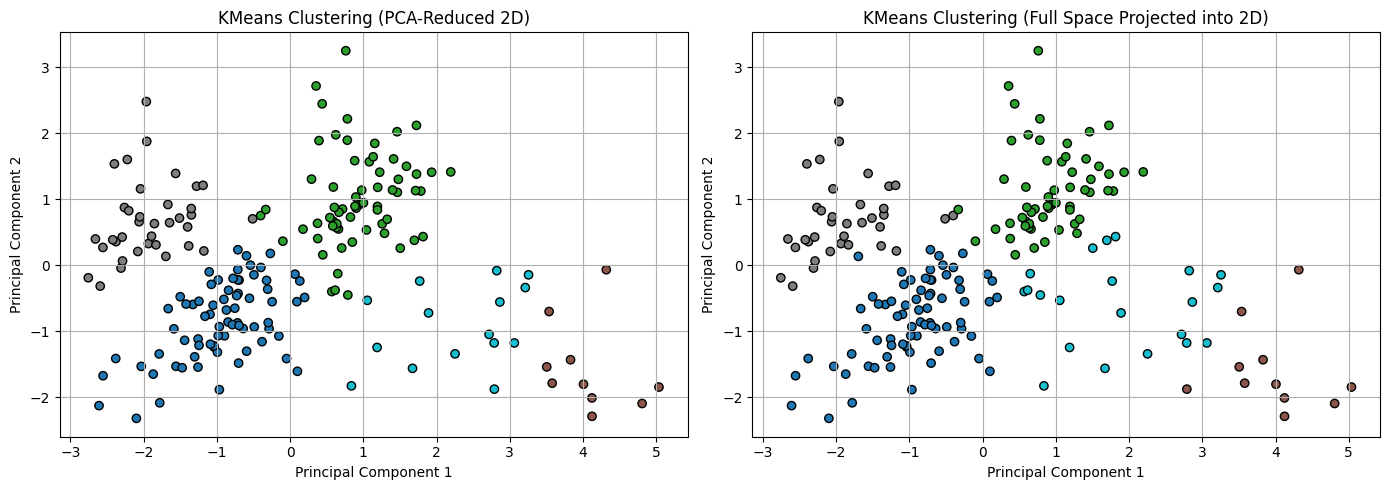

In [ ]:
# PCA space visualization
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(pca_2d_components[:, 0], pca_2d_components[:, 1], c=labels_2d, cmap='tab10', edgecolor='k')
plt.title('KMeans Clustering (PCA-Reduced 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# t-SNE optional plot for full space (not strictly chapter-style, can skip)
plt.subplot(1, 2, 2)
plt.scatter(pca_2d_components[:, 0], pca_2d_components[:, 1], c=labels_full, cmap='tab10', edgecolor='k')
plt.title('KMeans Clustering (Full Space Projected into 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()


RESULTS:

Full Scaled Data = High-dimensional structure

2D PCA-Reduced	= More compact & interpretable

### 📊 Clustering Methods Comparison Table

| Method             | Clusters Found | Inertia  | Silhouette Score | Execution Time (s) | Notes                                      |
|--------------------|----------------|----------|-------------------|---------------------|---------------------------------------------|
| KMeans             | 5              | 222.05   | 0.41              | 0.0069              | Best quality, stable clusters               |
| MiniBatch KMeans   | 5              | 270.77   | 0.35              | 0.0107              | Similar to KMeans, slightly lower score     |
| DBSCAN             | 5              | —        | 0.21              | 0.0063              | High noise, sensitive to parameters         |



After applying and comparing KMeans, DBSCAN and MiniBatch KMeans, we found that KMeans provided the best performance on this dataset.



*  KMeans gave the highest silhouette score(0.41), which means well
separated and stable clusters.

*   MiniBatch KMeans gave slightly lower quality, but still performed well.

*   On the other hand, BDSCAN gave the least reliable clusters and was the most sensitive to parameter tuning so it struggled with this dataset.

In terms of execution time, KMeans was the fastest, followed closely by DBSCAN. MiniBatch KMeans took slightly longer, likely due to the overhead of processing in small batches, which doesn't provide a speed advantage on such a small dataset.

In conclusion and since the dataset is relatively small, we can say that the difference of the execution time between algorithms would not be a burden in this case. Instead, we can focus on the cluster quality and clarity.







